<a href="https://colab.research.google.com/github/dkant000/ML_PROJECT/blob/master/ML_CW_code_final_%5BShopper's_purchase_intention%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, \
                            classification_report, f1_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
label_encoder = preprocessing.LabelEncoder() 

In [20]:
data = pd.read_csv('dataset.csv',index_col=None)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Descriptive Analysis

In [21]:
# description of Administrative, Informational, ProductRelated,ExitRates, PageValues, SpecialDay
data[['Administrative','Informational','ProductRelated','ExitRates','PageValues','SpecialDay']].describe()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,0.503569,31.731468,0.043073,5.889258,0.061427
std,3.321784,1.270156,44.475503,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,0.014286,0.000000,0.000000
50%,1.000000,0.000000,18.000000,0.025156,0.000000,0.000000
75%,4.000000,0.000000,38.000000,0.050000,0.000000,0.000000
max,27.000000,24.000000,705.000000,0.200000,361.763742,1.000000


In [22]:
# description of Month, OperatingSystems, Browser, Region, TrafficType
data[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']].describe()

,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.124006,2.357097,3.147364,4.069586
std,0.911325,1.717277,2.401591,4.025169
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000
50%,2.000000,2.000000,3.000000,2.000000
75%,3.000000,2.000000,4.000000,4.000000
max,8.000000,13.000000,9.000000,20.000000


In [23]:

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


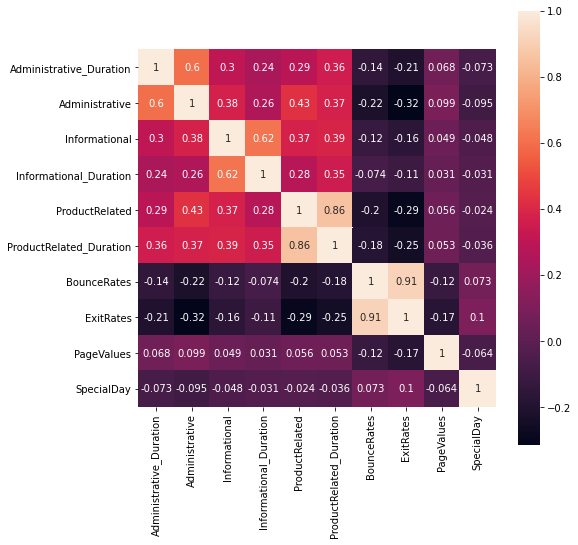

In [24]:
# correlation between numerical features of dataset 

f,ax=plt.subplots(figsize=(8,8))
correlation=data[['Administrative_Duration','Administrative','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']].corr()
sns.heatmap(correlation,annot=True,square=True)


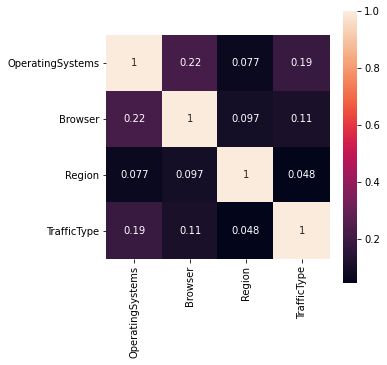

In [25]:
# coorellation between categorical features of dataset 

f,ax=plt.subplots(figsize=(5,5))
correlation=data[['OperatingSystems','Browser','Region','TrafficType']].corr()
sns.heatmap(correlation,annot=True,square=True)

Text(0, 0.5, 'Bounce Rates')

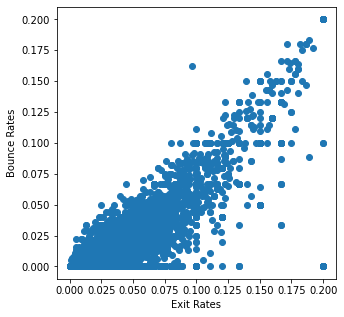

In [26]:
# scatterplot to show correlation between attributes
f,ax=plt.subplots(figsize=(5,5))
plt.scatter('ExitRates','BounceRates',data=data)
plt.xlabel('Exit Rates')
plt.ylabel('Bounce Rates')

# Exploratory Data Analysis [EDA] 



### *Univariate Data Analysis*



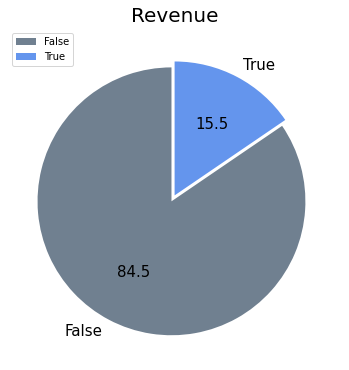

In [27]:
# Plotting a pie chart for Revenue
# Shows imbalanced data
plt.figure(figsize=(6,7))
data['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.05,0),colors=['slategray','cornflowerblue'])
plt.title('Revenue', fontsize = 20)
plt.ylabel('')
plt.legend()

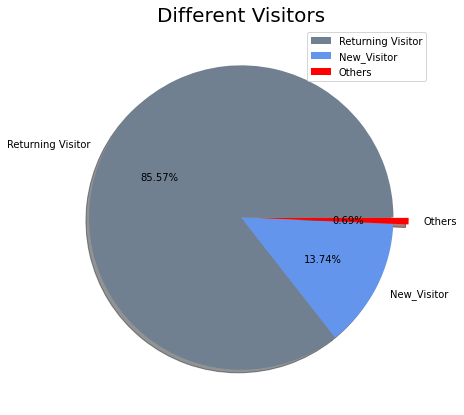

In [28]:
# plotting a pie chart for Visitors
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['slategray','cornflowerblue','red']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 20)
plt.axis('off')
plt.legend()

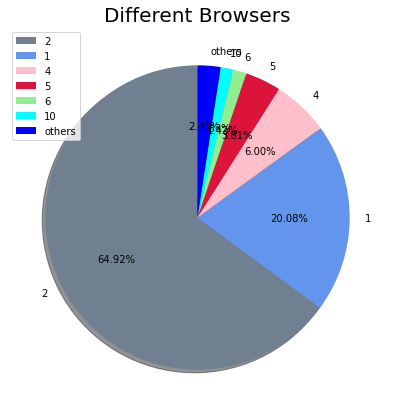

In [29]:
# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['slategray', 'cornflowerblue', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

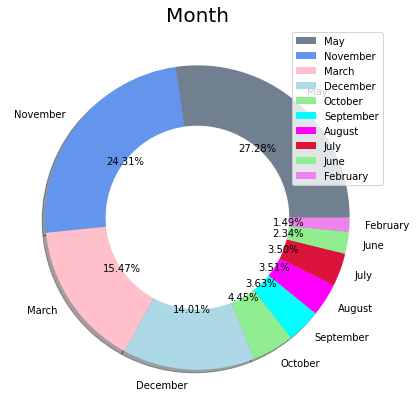

In [30]:
# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['slategray', 'cornflowerblue', 'pink', 'lightblue', 'lightgreen', 'cyan', 'magenta', 'crimson', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

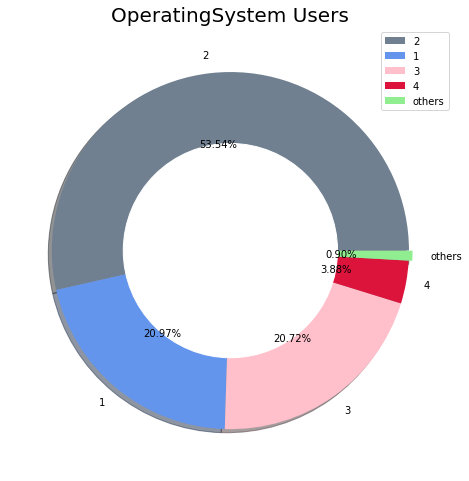

In [31]:
# plotting a pie chart for different number of OperatingSystems users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['slategray', 'cornflowerblue', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0.02]

circle = plt.Circle((0, 0), 0.6, color = 'white')
# plt.subplot(1, 2, 1)
plt.figure(figsize=(8,12))
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OperatingSystem Users', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()


###  *Bivariate Data Analysis*



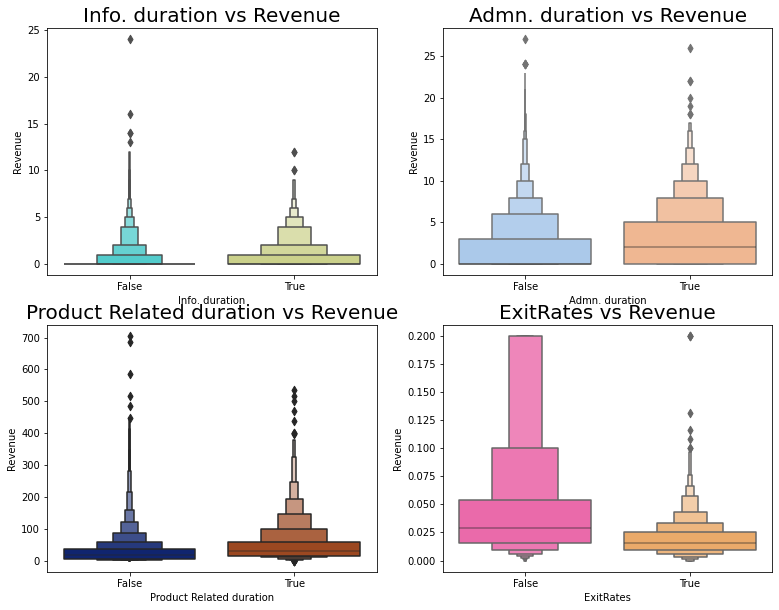

In [32]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (13, 10)

plt.subplot(2, 2, 1)
sns.boxenplot(data['Revenue'], data['Informational'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 20)
plt.xlabel('Info. duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(data['Revenue'], data['Administrative'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 20)
plt.xlabel('Admn. duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(data['Revenue'], data['ProductRelated'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 20)
plt.xlabel('Product Related duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(data['Revenue'], data['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 20)
plt.xlabel('ExitRates', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)
plt.show()

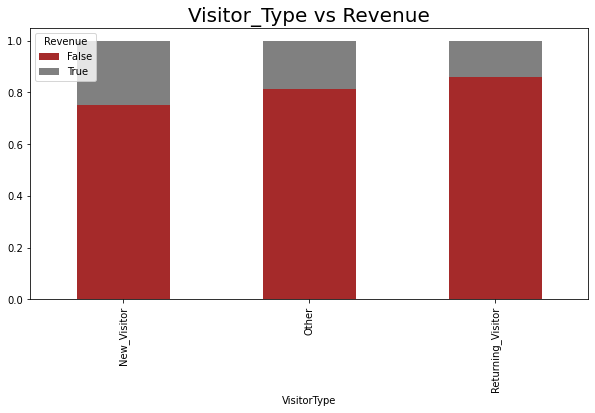

In [33]:
# barplot of visitorType vs Revenue
dff2 = pd.crosstab(data['VisitorType'], data['Revenue'])
dff2.div(dff2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5),color=['brown','grey'])
plt.title('Visitor_Type vs Revenue', fontsize = 20)
plt.show()

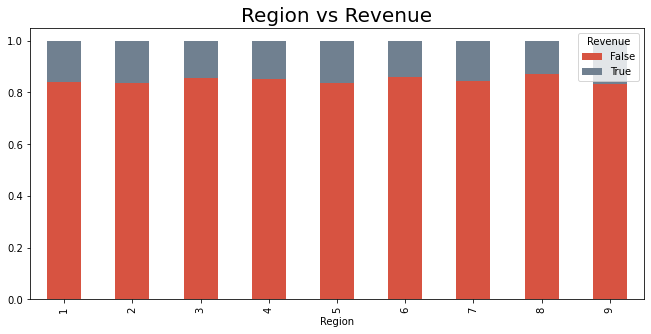

In [34]:
# f,ax=plt.subplots(figsize=(8,8))
data1 = pd.crosstab(data['Region'], data['Revenue'])
data1.div(data1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (11, 5),color=['#D75341','slategray'])
plt.title('Region vs Revenue', fontsize = 20)
plt.show()

,Month_name,True_Revenue,False_Revenue,True_Percent
1,Aug,76,357,21.2885
2,Dec,216,1511,14.2952
3,Feb,3,181,1.65746
4,Jul,66,366,18.0328
5,June,29,259,11.1969
6,Mar,192,1715,11.1953
7,May,365,2999,12.1707
8,Nov,760,2238,33.9589
9,Oct,115,434,26.4977
10,Sep,86,362,23.7569


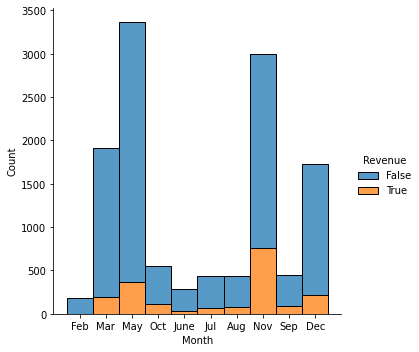

In [35]:
# Month vs Revenue 
counts=[]
count_false = []
x = list(data['Revenue'])
y=list(data['Month'])
new_list=['Aug','Dec','Feb','Jul','June','Mar','May','Nov','Oct','Sep']
month_list=['Aug','Dec','Feb','Jul','June','Mar','May','Nov','Oct','Sep','total']
 
new_list[0]
for j in range(len(new_list)):
  count=0
  for i in range(len(x)):
    if y[i]==new_list[j] and x[i]==1:
      count+=1
      # print(count)
  counts.append(count)
  X=(count)

for j in range(len(new_list)):
  count=0
  for i in range(len(x)):
   if y[i]==new_list[j] and x[i]==0:
     count+=1
  count_false.append(count)
  X=(count)
 
ratio_list =[] 
ratio = 0
 
for i in range(len(new_list)):
  ratio = counts[i]/count_false[i]
  ratio = ratio*100
  ratio_list.append(ratio)
 
total_true = 0
total_false = 0
for i in range(0, len(counts)):
 total_true = total_true + counts[i]
# print(total_true)
 
for i in range(0, len(count_false)):
 total_false = total_false + count_false[i]
# print(total_false)
 
counts.append(total_true)
count_false.append(total_false)
ratio_list.append('')
New_list_DataFrame=DataFrame(month_list,columns=["Month_name"],index=[1,2,3,4,5,6,7,8,9,10,11])
DATA=DataFrame(counts,columns=["True_Revenue"],index=[1,2,3,4,5,6,7,8,9,10,11])
DATA_false=DataFrame(count_false,columns=["False_Revenue"],index=[1,2,3,4,5,6,7,8,9,10,11])
ratio_col = DataFrame(ratio_list,columns=["True_Percent"],index=[1,2,3,4,5,6,7,8,9,10,11])
Data_con=pd.concat([New_list_DataFrame,DATA,DATA_false,ratio_col],axis="columns")
display(Data_con)
print('\n')
sns.displot(data, x="Month", hue="Revenue" ,multiple = "stack")

In [36]:
# month label encoded
data['Month']= label_encoder.fit_transform(data['Month']) 

# Data Pre-processing

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc


In [38]:
# Verify and print NON NULL values, if any !
print(data.isna().sum())
print(data.info())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12

In [39]:
data['Browser']=data['Browser'].astype('int')
data['OperatingSystems']=data['OperatingSystems'].astype('int')
# Weekend and Revenue feature is of type bool, so converting that into integer 
data['Weekend'] = data['Weekend'].astype(np.int)
data['Revenue'] = data['Revenue'].astype(np.int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### *Outliers*

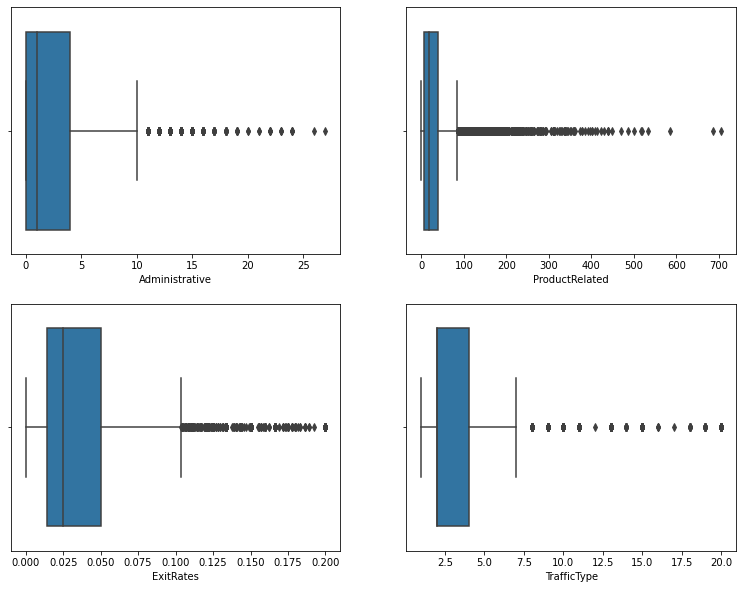

In [40]:
# PLOTS FOR CHECKING OUTLIERS

plt.rcParams['figure.figsize'] = (13, 10)
plt.subplot(2, 2, 1)
sns.boxplot(x=data['Administrative'])

# product related duration vs revenue
plt.subplot(2, 2, 2)
sns.boxplot(x=data['ProductRelated'])

# product related duration vs revenue
plt.subplot(2, 2, 3)
sns.boxplot(x=data['ExitRates'])

# exit rate vs revenue
plt.subplot(2, 2, 4)
sns.boxplot(x=data['TrafficType'])
plt.show()

### *Encoding {dummies}*

In [41]:
# Use get_dummies to split attribute VisitorType into different features
x = pd.get_dummies(data)
x # dataframe after splitting using dummies


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,1,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,1,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,1,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,0,0,0,0,1


In [42]:
# From above coorelation, the attributes Administrative_Duration, Informational_Duration, ProductRelated_Duration, BounceRates
# can be removed as they have very high coorelation between them

x = x.drop(['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates'],axis=1)
x   # dataframe after feature selection

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0.200000,0.000000,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0,2,0.100000,0.000000,0.0,2,2,2,1,2,0,0,0,0,1
2,0,0,1,0.200000,0.000000,0.0,2,4,1,9,3,0,0,0,0,1
3,0,0,2,0.140000,0.000000,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0,10,0.050000,0.000000,0.0,2,3,3,1,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,53,0.029031,12.241717,0.0,1,4,6,1,1,1,0,0,0,1
12326,0,0,5,0.021333,0.000000,0.0,7,3,2,1,8,1,0,0,0,1
12327,0,0,6,0.086667,0.000000,0.0,7,3,2,1,13,1,0,0,0,1
12328,4,0,15,0.021053,0.000000,0.0,7,2,2,3,11,0,0,0,0,1




### *Scalling*



In [43]:
# standard scale
from sklearn.preprocessing import StandardScaler
label_encoder = preprocessing.LabelEncoder() 
cols_to_scale = ['Administrative',
 'Informational',
 'ProductRelated',
 'ExitRates',
 'PageValues',
 'SpecialDay',]
# from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
x

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.396478,-0.691003,3.229316,-0.317178,-0.308821,2,1,1,1,1,0,0,0,0,1
1,-0.696993,-0.396478,-0.668518,1.171473,-0.317178,-0.308821,2,2,2,1,2,0,0,0,0,1
2,-0.696993,-0.396478,-0.691003,3.229316,-0.317178,-0.308821,2,4,1,9,3,0,0,0,0,1
3,-0.696993,-0.396478,-0.668518,1.994610,-0.317178,-0.308821,2,3,2,2,4,0,0,0,0,1
4,-0.696993,-0.396478,-0.488636,0.142551,-0.317178,-0.308821,2,3,3,1,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,-0.396478,0.478227,-0.288966,0.342125,-0.308821,1,4,6,1,1,1,0,0,0,1
12326,-0.696993,-0.396478,-0.601062,-0.447364,-0.317178,-0.308821,7,3,2,1,8,1,0,0,0,1
12327,-0.696993,-0.396478,-0.578577,0.897093,-0.317178,-0.308821,7,3,2,1,13,1,0,0,0,1
12328,0.507228,-0.396478,-0.376210,-0.453140,-0.317178,-0.308821,7,2,2,3,11,0,0,0,0,1


Text(0.5, 0, 'PageValue before Standard Scalling')

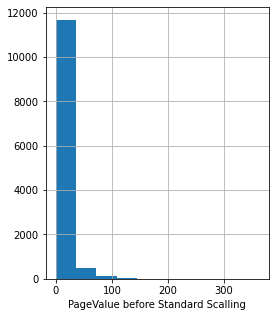

In [44]:
plt.figure(figsize=(4,5))
data.PageValues.hist()
plt.xlabel('PageValue before Standard Scalling')

Text(0.5, 0, 'PageValue after Standard Scalling')

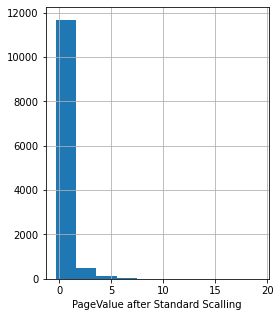

In [45]:
plt.figure(figsize=(4,5))
x.PageValues.hist()
plt.xlabel('PageValue after Standard Scalling')

In [46]:
# Spliting the dataset into 2 forms, one with revenue and other with rest 
y = x['Revenue']
x = x.drop('Revenue',axis=1)




### ***SMOTE***



In [47]:
from imblearn.over_sampling import SMOTE
print("shape of x before",x.shape)
print("shape of y before",y.shape)
smote = SMOTE(sampling_strategy='minority');
x_smote, y_smote = smote.fit_sample(x,y);
print("Shape of x_smote :", x_smote.shape)
print("Shape of y_smote :", y_smote.shape)

shape of x before (12330, 15)
shape of y before (12330,)
Shape of x_smote : (20844, 15)
Shape of y_smote : (20844,)


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.30)
print("Shape of x_train :", x_train.shape)
print("Shape of x_test  :", x_test.shape)
print("Shape of y_train  :", y_train.shape)
print("Shape of y_test  :", y_test.shape)

Shape of x_train : (14590, 15)
Shape of x_test  : (6254, 15)
Shape of y_train  : (14590,)
Shape of y_test  : (6254,)


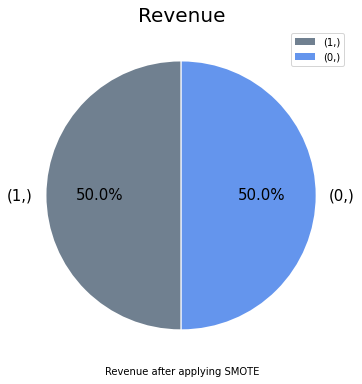

In [49]:
# Plotting a pie chart for Revenue after balancing the dataset
 
list_Revenue=pd.DataFrame(y_smote)
plt.figure(figsize=(6,7))
list_Revenue.value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize': 15},startangle=90,explode =(0.01,0),colors=['slategray','cornflowerblue'])
plt.title('Revenue', fontsize = 20)
plt.ylabel('')
plt.xlabel('Revenue after applying SMOTE')
plt.legend()

# Model Fitting


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [51]:
#define Confusion matrix

def ConfusionMatrix(A,B):
  CM=confusion_matrix(A, B)
  plt.figure(figsize=(5,4))
  fig, ax = plot_confusion_matrix(CM,show_absolute=True,show_normed=True,colorbar=True)
  plt.show()



### ***1. Random Forest Classifier***



Training Accuracy : 0.9810143934201508
Testing Accuracy : 0.9323632874960026
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3147
           1       0.92      0.95      0.93      3107

    accuracy                           0.93      6254
   macro avg       0.93      0.93      0.93      6254
weighted avg       0.93      0.93      0.93      6254



<Figure size 360x288 with 0 Axes>

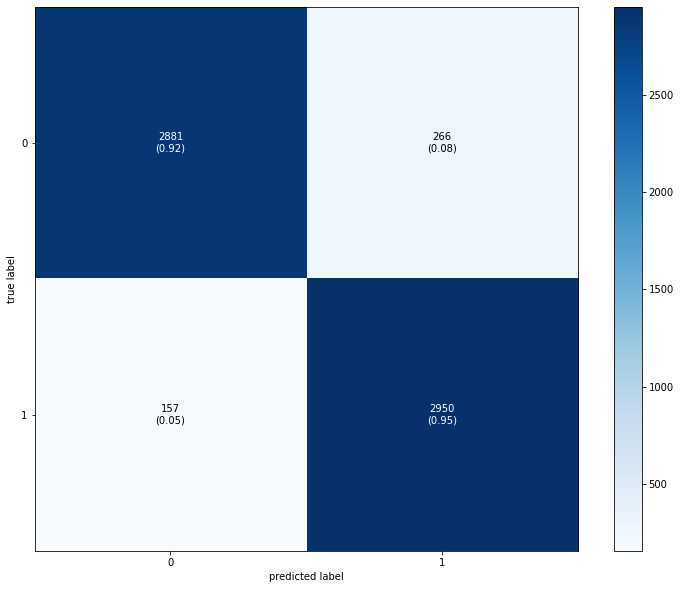

In [52]:
# Creating Random Forest Classifier

model = RandomForestClassifier(min_samples_leaf=2,min_samples_split=5,random_state=100)
model.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(x_test)
# evaluating the model
rf_train_acu = model.score(x_train, y_train)
rf_test_acu = model.score(x_test, y_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))
ConfusionMatrix(y_test,y_pred)

In [53]:
# Apply HYPERPARAMETER TUNNING {GridSearchCV} TO FIND BEST RESULT PARAMETERS

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(random_state=100), {
    'min_samples_leaf': [1,2,5,10,15,20,25],
    'min_samples_split': [5,10,15,20]
}, cv=5, return_train_score=False)
clf.fit(x_test,y_pred)
model_data=pd.DataFrame(clf.cv_results_)
# print(model_data[['param_min_samples_leaf','param_min_samples_split','mean_test_score']])

print('Best Score for RF is : ',clf.best_score_)
print('Best fitted parameters for RF classifier is :',clf.best_params_)

Best Score for RF is :  0.9635439168665068
Best fitted parameters for RF classifier is : {'min_samples_leaf': 1, 'min_samples_split': 5}


<Figure size 936x720 with 0 Axes>

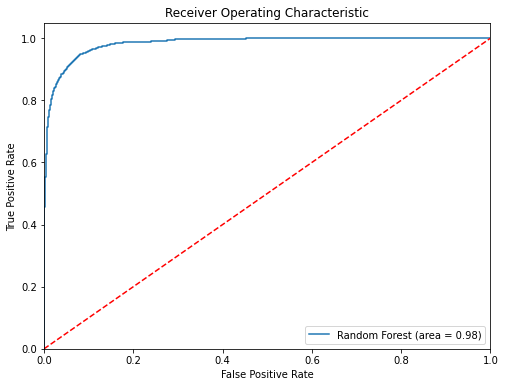

In [54]:
# ROC AUC CURVE FOR RANDOM FOREST

rf_roc_auc = roc_auc_score(y_test, y_pred)
fpr2, tpr2, thresolds2 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(8,6))
plt.plot(fpr2, tpr2, label = 'Random Forest (area = %0.2f)' % roc_auc2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Random Forest ROC')
plt.show()



### ***3. KNN Classifier***



Training Accuracy : 0.9917066483893078
Testing Accuracy : 0.917972497601535
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3147
           1       0.89      0.95      0.92      3107

    accuracy                           0.92      6254
   macro avg       0.92      0.92      0.92      6254
weighted avg       0.92      0.92      0.92      6254



<Figure size 360x288 with 0 Axes>

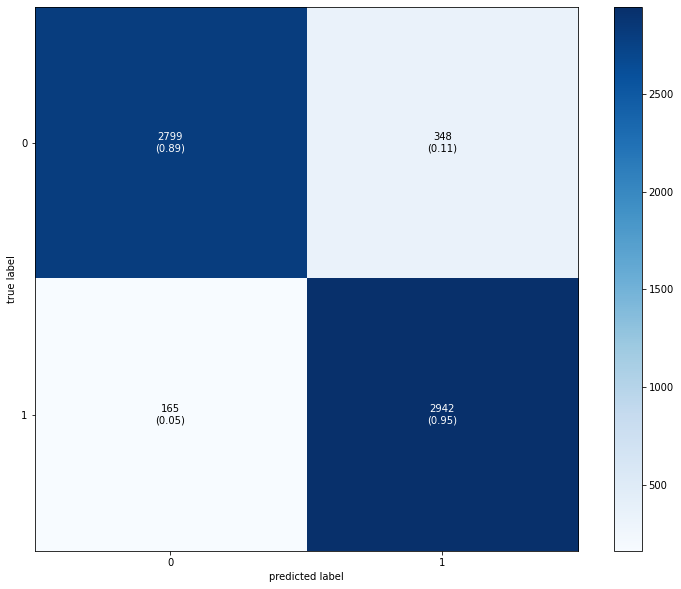

In [55]:
#Creating KNN Classifier

knn = KNeighborsClassifier(n_neighbors= 2, weights='uniform')
knn.fit(x_train, y_train)
# Predicting dataset response
y_pred = knn.predict(x_test)
# Evaluate and display Training and Testing Acvuracy
knn_train_acu = knn.score(x_train, y_train)
knn_test_acu = knn.score(x_test, y_test)
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuracy :", knn.score(x_test, y_test))
confusion_matrix(y_test,y_pred)
# Display Classification Report
print(classification_report(y_test,y_pred))
# Confusion matrix call
ConfusionMatrix(y_test,y_pred)

In [56]:
# Apply HYPERPARAMETER TUNNING {GridSearchCV} TO FIND BEST RESULT PARAMETERS

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
k_range = list(range(2,10))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn_grid = KNeighborsClassifier()
grid = GridSearchCV(knn_grid, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train, y_train)

print ('Best score = ',grid.best_score_)
print ('Best parameters are = ',grid.best_params_)
print ('Best estimator is = ',grid.best_estimator_)

Best score =  0.9098012337217274
Best parameters are =  {'n_neighbors': 2, 'weights': 'distance'}
Best estimator is =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')


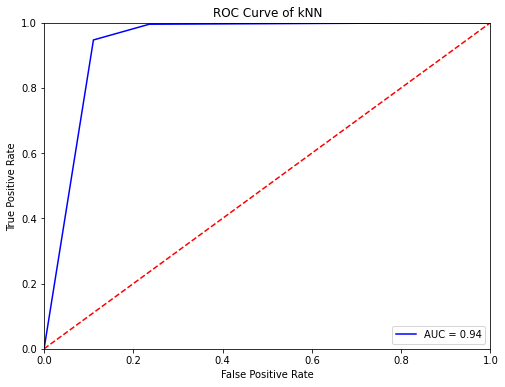

In [57]:
# ROC AUC curve for knn
plt.figure(figsize=(8,6))
y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()



### ***5. SVM Classifier***





Training Accuracy : 0.8338588074023303
Testing Accuracy : 0.834026223217141
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      3147
           1       0.88      0.77      0.82      3107

    accuracy                           0.83      6254
   macro avg       0.84      0.83      0.83      6254
weighted avg       0.84      0.83      0.83      6254



<Figure size 360x288 with 0 Axes>

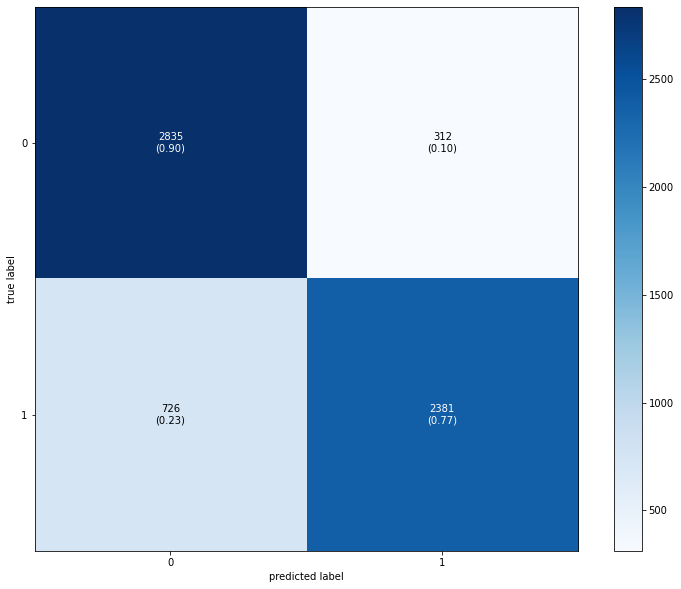

In [58]:
# SVM Classifier {takes some time to execute this code cell}

svclassifier=SVC(kernel='linear',C=10, gamma= 0.0001, probability=True) 
svclassifier.fit(x_train,y_train)
y_predict=svclassifier.predict(x_test)
# evaluating the model
svm_train_acu = svclassifier.score(x_train, y_train)
svm_test_acu =  svclassifier.score(x_test, y_test)
print("Training Accuracy :", svclassifier.score(x_train, y_train))
print("Testing Accuracy :", svclassifier.score(x_test, y_test))
# eveluate confusion matrix
print(classification_report(y_test,y_predict))
# confusion matrix
ConfusionMatrix(y_test,y_predict)

In [59]:
# CHECKING ALL KERNAL FOR BEST CLASSIFIER 
'''
ker = ['linear','rbf','poly','sigmoid']
for i in ker:
  svclassifier=SVC(kernel=i,gamma= 0.0001, probability=True)
# svclassifier=SVC(kernel='sigmoid') # worse
  svclassifier.fit(x_train,y_train)

  y_predict=svclassifier.predict(x_test)

# evaluating the model
  print("kernal :",i)
  print("Training Accuracy of :", svclassifier.score(x_train, y_train))
  print("Testing Accuracy :", svclassifier.score(x_test, y_test))

# eveluate confusion matrix
  print(classification_report(y_test,y_predict))

# confusion matrix
  ConfusionMatrix(y_test,y_predict)
  '''

'\nker = [\'linear\',\'rbf\',\'poly\',\'sigmoid\']\nfor i in ker:\n  svclassifier=SVC(kernel=i,gamma= 0.0001, probability=True)\n# svclassifier=SVC(kernel=\'sigmoid\') # worse\n  svclassifier.fit(x_train,y_train)\n\n  y_predict=svclassifier.predict(x_test)\n\n# evaluating the model\n  print("kernal :",i)\n  print("Training Accuracy of :", svclassifier.score(x_train, y_train))\n  print("Testing Accuracy :", svclassifier.score(x_test, y_test))\n\n# eveluate confusion matrix\n  print(classification_report(y_test,y_predict))\n\n# confusion matrix\n  ConfusionMatrix(y_test,y_predict)\n  '

In [60]:
clf = GridSearchCV(SVC(gamma='auto',), {
 'C': [0.05,0.5,1,1.5,2,10,],
 'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(x_test,y_predict) 
#best parameters for classifier
print("The best hyperparameters for SVM classifier is : ",clf.best_params_)

The best hyperparameters for SVM classifier is :  {'C': 10, 'kernel': 'linear'}


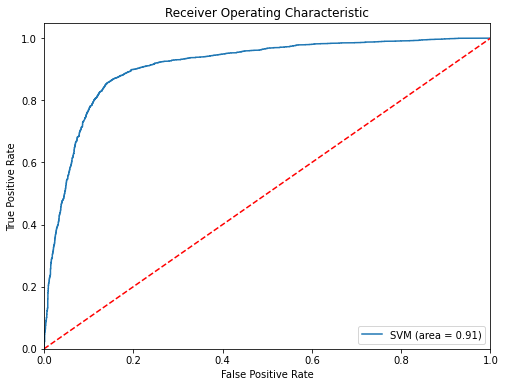

In [61]:
# ROC of SVM
svm_roc_auc = roc_auc_score(y_test, y_predict)
fpr3, tpr3, thresolds3 = roc_curve(y_test, svclassifier.predict_proba(x_test)[:,1])
plt.figure(figsize=(8,6))
roc_auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label = 'SVM (area = %0.2f)' % roc_auc3)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM ROC')
plt.show()

# **Model Evaluation**

## ***Comparision of ROC and PR curves of all models***

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


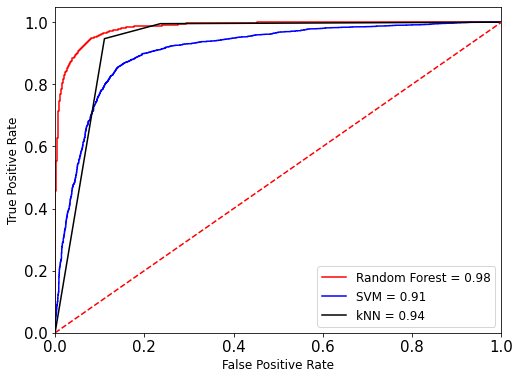

The ROC of each model is: 
Random Forest, SVM, kNN
(0.8671437917741431, 0.7150486580268282, 0.8363126038776488)


In [62]:
Font={'size':12, 'family':'Times New Roman'}
plt.figure(figsize=(8,6))
# plt.plot(fpr1, tpr1, 'b', label = 'Logistic Reg. = %0.2f' % roc_auc1, color='g')
plt.plot(fpr2, tpr2, 'b', label = 'Random Forest = %0.2f' % roc_auc2, color='r')
plt.plot(fpr3, tpr3, 'b', label = 'SVM = %0.2f' % roc_auc3, color='b')
plt.plot(fpr, tpr, 'b', label = 'kNN = %0.2f' % roc_auc, color='black')
# plt.plot(fpr4, tpr4, 'b', label = 'Decision Tree = %0.2f' % roc_auc, color='blue')
plt.legend(loc = 'lower right', prop=Font)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate', Font)
plt.xlabel('False Positive Rate', Font)
plt.tick_params(labelsize=15)
plt.show()
best_score = abs(fpr2 - tpr2).max(),abs(fpr3 - tpr3).max(),abs(fpr - tpr).max()
print("The ROC of each model is: ")
print("Random Forest, SVM, kNN")
print(best_score)

Text(0.5, 1.0, 'Precision-Recall curve')

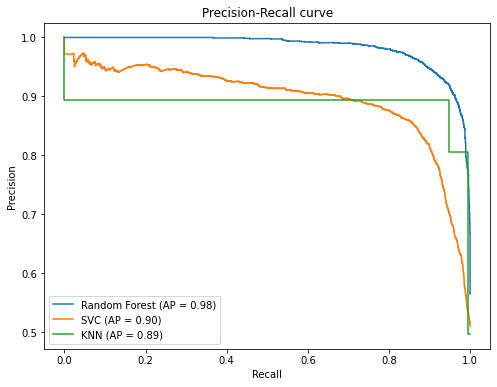

In [63]:
# PRC Curve
plt.figure(figsize=(8,6))
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model, x_test, y_test, ax = plt.gca(),name = "Random Forest")
plot_precision_recall_curve(svclassifier, x_test, y_test, ax = plt.gca(),name = "SVC")
plot_precision_recall_curve(knn, x_test, y_test, ax = plt.gca(),name = "KNN")
 
plt.title('Precision-Recall curve')



# **Conclusion**

In [64]:
model_acu = [['Random Forest',rf_test_acu,rf_train_acu],['KNN',knn_test_acu,knn_train_acu],['SVM',svm_test_acu,svm_train_acu]]
df_acu = pd.DataFrame(model_acu, columns = ['Model', 'Test Accuracy','Train Accuracy']) 
df_acu

,Model,Test Accuracy,Train Accuracy
0,Random Forest,0.932363,0.981014
1,KNN,0.917972,0.991707
2,SVM,0.834026,0.833859
